# Business Understanding

The goal is to save the new home buyers some time and to help ensure consistency in pricing between new houses on the market and old houses.

The main purpose of this algorithm is predictive, meaning that this model should be able to take in attributes of the King's County dataset that does not yet have a set price, and to predict a good price. The effectiveness of this predictive model will be measured by how well it predicts prices in our test set, where we know what the actual prices were but the model does not.

The secondary purpose of this algorithm is inferential, meaning that the model should be able to tell us something about the relationship between the attributes of a house in King's County and its price. 

### Analysis Questions

This analysis will seek to answer three questions about the data:

**Question 1:** Which features are most highly correlated with price?

**Question 2:** Which features have the strongest correlations with other predictor variables?

**Question 3:** What combinations of features is the best fit, in terms of predictive power, for a multiple regression model to predict house prices?

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore') # Ignores big red warning signs
 
%matplotlib inline
sns.set_style("whitegrid")

In [7]:
df = pd.read_csv('data/kc_house_data.csv')

In [8]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [10]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Handling Missing Values

In [11]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [12]:
print(df['waterfront'].isnull().count())
print(df['waterfront'].nunique())
print(df['waterfront'].unique())
print(df['waterfront'].value_counts())

21597
2
[nan 'NO' 'YES']
NO     19075
YES      146
Name: waterfront, dtype: int64


In [13]:
print(df['view'].nunique())
print(df['view'].unique())
print(df['view'].value_counts())

5
['NONE' nan 'GOOD' 'EXCELLENT' 'AVERAGE' 'FAIR']
NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64


In [14]:
print(df['yr_renovated'].nunique())
print(df['yr_renovated'].unique())

70
[   0. 1991.   nan 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984.
 1954. 2014. 2011. 1983. 1945. 1990. 1988. 1977. 1981. 1995. 2000. 1999.
 1998. 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 2001. 1980. 1971.
 1979. 1997. 1950. 1969. 1948. 2009. 2015. 1974. 2008. 1968. 2012. 1963.
 1951. 1962. 1953. 1993. 1996. 1955. 1982. 1956. 1940. 1976. 1946. 1975.
 1964. 1973. 1957. 1959. 1960. 1967. 1965. 1934. 1972. 1944. 1958.]


In [15]:
print(df['floors'].nunique())
print(df['floors'].unique())
print(df['floors'].value_counts())

6
[1.  2.  1.5 3.  2.5 3.5]
1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64


In [16]:
df['yr_renovated'].fillna(0,inplace=True)

In [17]:
df['view'].fillna('NONE', inplace=True)

In [18]:
df['waterfront'].fillna('NO', inplace=True)

0.0 yr_renovated is not actually information that is missing from our dataset, it is a genuine category which means the house has never been renovated. This interpretation aligns with what we see in data/column_names.txt. So, let's replace those NaNs with the string "N/A" to indicate that this is a real category, not missing data:

In [19]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [20]:
df['date'] = pd.to_datetime(df['date'])
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NO,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,NO,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [21]:
df["month"] = df["date"].dt.month

In [22]:
 def getSeason(month):
    if (month > 11 or month <= 2):
       return "Winter"
    elif (month >= 3 and month <= 5):
       return "Spring"
    elif (month >=6 and month <= 8):
       return "Summer"
    else:
       return "Fall"

In [23]:
df["season"] = df["month"].apply(getSeason)

In [24]:
print(df['season'].value_counts())

Spring    6518
Summer    6328
Fall      5056
Winter    3695
Name: season, dtype: int64


In [25]:
df.sqft_basement = df.sqft_basement.replace('?', '0.0')

In [26]:
df.sqft_basement = df.sqft_basement.astype('float')

In [27]:
df.floors = df.floors.astype('object')

In [28]:
df.sqft_basement = df.sqft_basement.astype(np.dtype('int64')) #converts column from float to int64, in line with the other similar columns

In [29]:
df.yr_renovated = df.yr_renovated.astype(np.dtype('int64'))

It's advisable to remove the `id` column as keeping it in won't lead to meaningful results.

In [30]:
df.drop(["id"],axis=1, inplace=True)

In [31]:
df.head(20)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,season
0,2014-10-13,221900.0,3,1.00,1180,5650,1,NO,NONE,Average,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,Fall
1,2014-12-09,538000.0,3,2.25,2570,7242,2,NO,NONE,Average,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,Winter
2,2015-02-25,180000.0,2,1.00,770,10000,1,NO,NONE,Average,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,Winter
3,2014-12-09,604000.0,4,3.00,1960,5000,1,NO,NONE,Very Good,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,Winter
4,2015-02-18,510000.0,3,2.00,1680,8080,1,NO,NONE,Average,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,Winter
5,2014-05-12,1230000.0,4,4.50,5420,101930,1,NO,NONE,Average,...,1530,2001,0,98053,47.6561,-122.005,4760,101930,5,Spring
6,2014-06-27,257500.0,3,2.25,1715,6819,2,NO,NONE,Average,...,0,1995,0,98003,47.3097,-122.327,2238,6819,6,Summer
7,2015-01-15,291850.0,3,1.50,1060,9711,1,NO,NONE,Average,...,0,1963,0,98198,47.4095,-122.315,1650,9711,1,Winter
8,2015-04-15,229500.0,3,1.00,1780,7470,1,NO,NONE,Average,...,730,1960,0,98146,47.5123,-122.337,1780,8113,4,Spring
9,2015-03-12,323000.0,3,2.50,1890,6560,2,NO,NONE,Average,...,0,2003,0,98038,47.3684,-122.031,2390,7570,3,Spring


In [32]:
categorical_cols = list(df.select_dtypes('object').columns)
categorical_cols

['floors', 'waterfront', 'view', 'condition', 'grade', 'season']

In [33]:
df[categorical_cols].nunique()

floors         6
waterfront     2
view           5
condition      5
grade         11
season         4
dtype: int64

In [34]:
cont_cols = list(df.select_dtypes('number').columns)
cont_cols

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'month']

In [35]:
df[cont_cols].nunique()

price            3622
bedrooms           12
bathrooms          29
sqft_living      1034
sqft_lot         9776
sqft_above        942
sqft_basement     303
yr_built          116
yr_renovated       70
zipcode            70
lat              5033
long              751
sqft_living15     777
sqft_lot15       8682
month              12
dtype: int64

### Identifying Categorical Variables

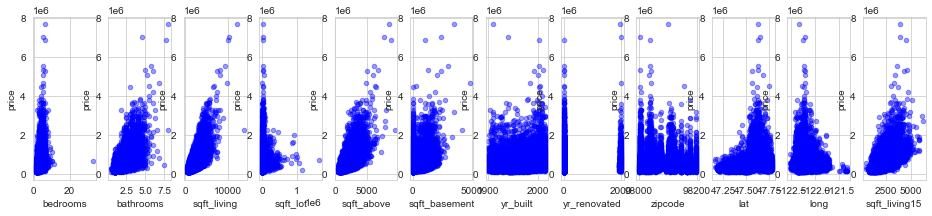

In [36]:
fig, axes = plt.subplots(nrows=1, ncols=12, figsize=(16,3))

for xcol, ax in zip(cont_cols[1:14], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

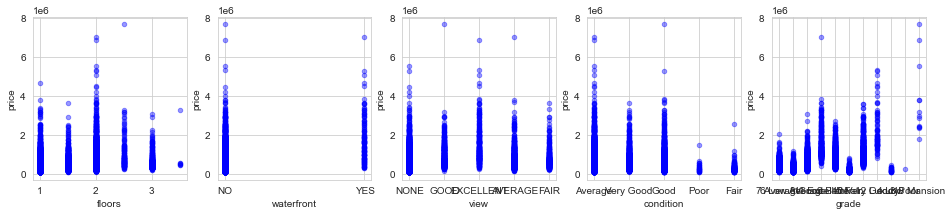

In [37]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16,3))

for xcol, ax in zip(categorical_cols, axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

### Interpret a Correlation Heatmap to Build a Baseline Model

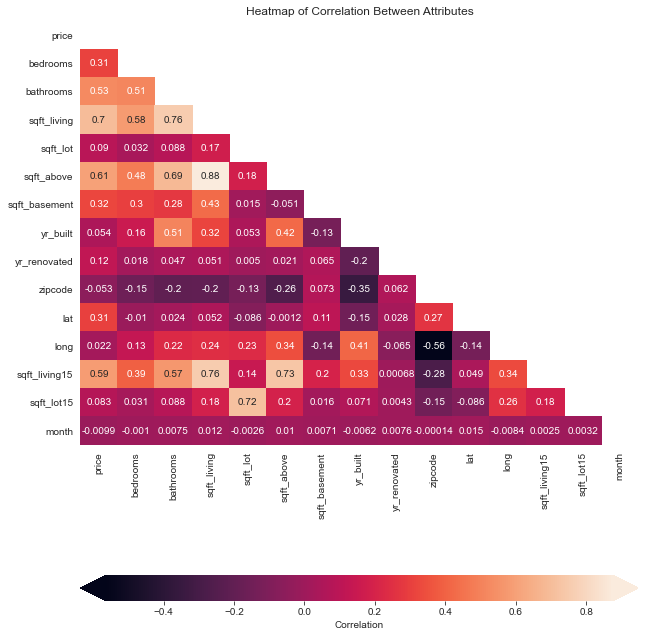

In [38]:
corr = df.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(10, 12))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes");

According to the heatmap above, `sqft_living` is the most strongly correlated with `price`.

# Building a Baseline Model 


In [39]:
X = df.drop(['price'], axis=1)
y = df[["price"]]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [41]:
from sklearn.model_selection import cross_validate, ShuffleSplit

baseline_model = LinearRegression()
splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_train[["sqft_living"]],
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.4902364458128316
Validation score: 0.4941920603055374


When you use `cross_validate`, it uses the .score method of the estimator by default. Because we are using the .score method of LinearRegression, these are **r-squared** scores. That means that each of them represents the amount of variance of the target, `price`, that is explained
by the model's features (currently just the `sqft_living`) and
parameters (intercept value and coefficient values for the features)

In general this seems like a fairly strong model already. It is
getting nearly identical performance on training subsets compared to
the validation subsets, explaining around 50% of the variance both times

We will perform a log transformation on `price` and `sqft_living` to improve the fit of the model.

In [42]:
log_price = np.log(df["price"])
log_sqft_living = np.log(df["sqft_living"])

In [43]:
f = 'log_price~log_sqft_living'
baseline_model = ols(formula=f, data=df).fit()
baseline_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                 1.805e+04
Date:                Thu, 30 Dec 2021   Prob (F-statistic):               0.00
Time:                        01:09:20   Log-Likelihood:                -10231.
No. Observations:               21597   AIC:                         2.047e+04
Df Residuals:                   21595   BIC:                         2.048e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           6.7234      0.047    142.612      0.000       6.631       6.816
log_sqft_living     0.8376      0.006    134.368      0.000       0.825       0.850
==============================================================================
Omnibus:                      123.577   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.096
Skew:                           0.143   Prob(JB):                     1.68e-25
Kurtosis:                       2.787   Cond. No.                         137.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

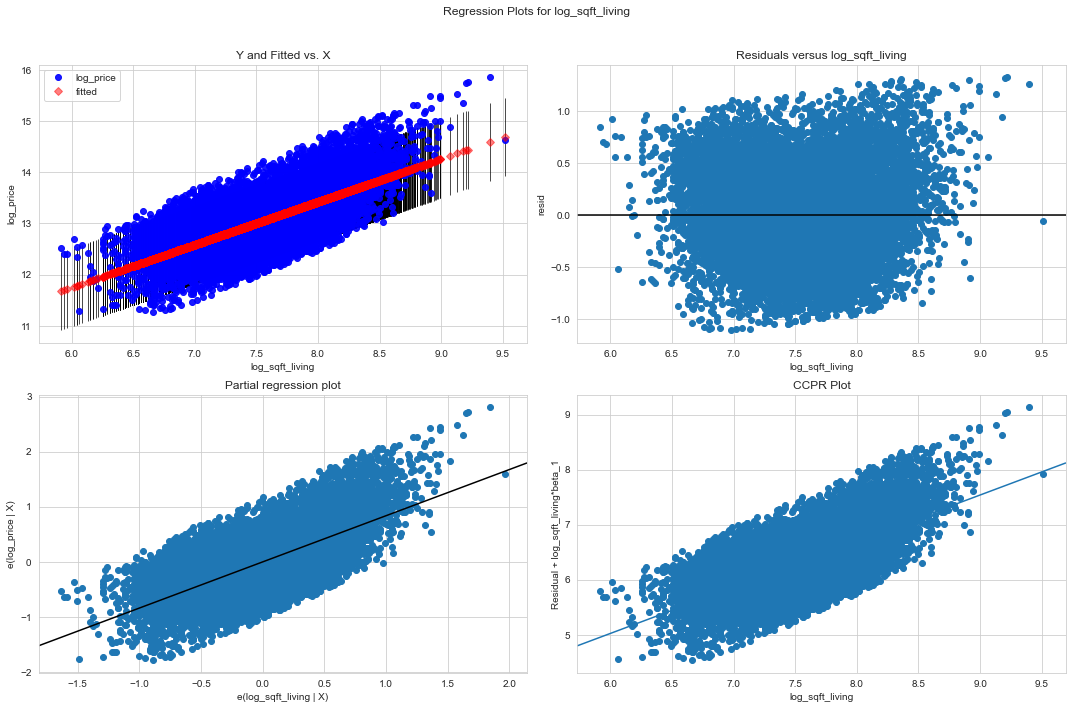

In [44]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(baseline_model, "log_sqft_living", fig=fig)
plt.show()

 From the first and second plot in the first row, we see that `log_price` variability is equal across values of `log_sqft_living`.  which is a sign of **homoscedasticity**. 

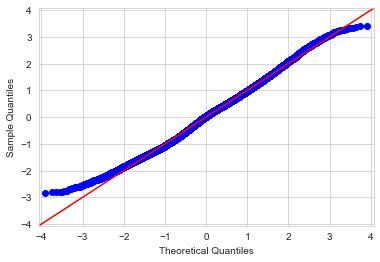

In [45]:
baseline_residuals = baseline_model.resid
fig = sm.graphics.qqplot(baseline_residuals, dist=stats.norm, line='45', fit=True)
fig.show()

Normal Q-Q Plots are a direct visual assessment of how well our residuals match what we would expect from a normal distribution. In the Q-Q plot above, you can see that residuals are normally distributed for `log_sqft_living`.

### Which features are most highly correlated with price?

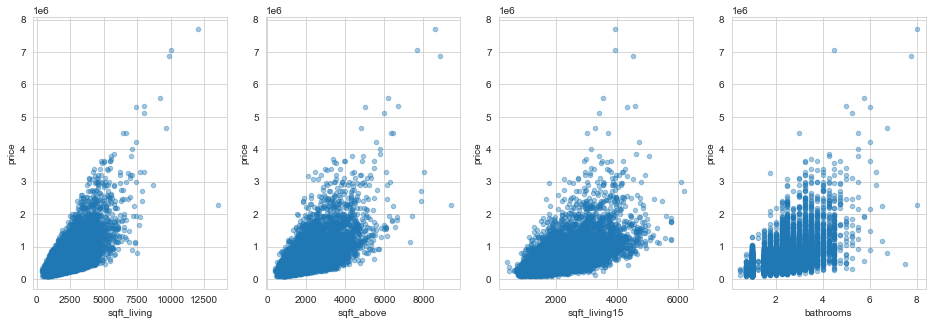

In [46]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,5))

for xcol, ax in zip(["sqft_living", "sqft_above", "sqft_living15","bathrooms"], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4)

### Identifying Multicollinearity

To understand the correlation structure of the predictors, we'll take a copy of the data but this time without the target variable (`price`) in it.

In [47]:
df_pred = df.drop(["price"], axis=1)

In [48]:
df_pred.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month
bedrooms,1.000000,0.514508,0.578212,0.032471,0.479386,0.297229,0.155670,0.017900,-0.154092,-0.009951,0.132054,0.393406,0.030690,-0.001046
bathrooms,0.514508,1.000000,0.755758,0.088373,0.686668,0.278485,0.507173,0.047177,-0.204786,0.024280,0.224903,0.569884,0.088303,0.007543
sqft_living,0.578212,0.755758,1.000000,0.173453,0.876448,0.428660,0.318152,0.051060,-0.199802,0.052155,0.241214,0.756402,0.184342,0.012112
sqft_lot,0.032471,0.088373,0.173453,1.000000,0.184139,0.015031,0.052946,0.004979,-0.129586,-0.085514,0.230227,0.144763,0.718204,-0.002591
sqft_above,0.479386,0.686668,0.876448,0.184139,1.000000,-0.051175,0.424037,0.020645,-0.261570,-0.001199,0.344842,0.731767,0.195077,0.010153
sqft_basement,0.297229,0.278485,0.428660,0.015031,-0.051175,1.000000,-0.130085,0.065008,0.073271,0.109853,-0.142369,0.199288,0.015885,0.007090
yr_built,0.155670,0.507173,0.318152,0.052946,0.424037,-0.130085,1.000000,-0.202555,-0.347210,-0.148370,0.409993,0.326377,0.070777,-0.006235
yr_renovated,0.017900,0.047177,0.051060,0.004979,0.020645,0.065008,-0.202555,1.000000,0.062397,0.027970,-0.064543,0.000683,0.004286,0.007649
zipcode,-0.154092,-0.204786,-0.199802,-0.129586,-0.261570,0.073271,-0.347210,0.062397,1.000000,0.266742,-0.564259,-0.279299,-0.147294,-0.000143
lat,-0.009951,0.024280,0.052155,-0.085514,-0.001199,0.109853,-0.148370,0.027970,0.266742,1.000000,-0.135371,0.048679,-0.086139,0.014995


In [49]:
abs(df_pred.corr()) > 0.7

,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month
bedrooms,True,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,True,True,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,True,True,False,True,False,False,False,False,False,False,True,False,False
sqft_lot,False,False,False,True,False,False,False,False,False,False,False,False,True,False
sqft_above,False,False,True,False,True,False,False,False,False,False,False,True,False,False
sqft_basement,False,False,False,False,False,True,False,False,False,False,False,False,False,False
yr_built,False,False,False,False,False,False,True,False,False,False,False,False,False,False
yr_renovated,False,False,False,False,False,False,False,True,False,False,False,False,False,False
zipcode,False,False,False,False,False,False,False,False,True,False,False,False,False,False
lat,False,False,False,False,False,False,False,False,False,True,False,False,False,False


It seems like are `sqft_above`, `sqft_living`, `sqft_living15`, `sqft_lot`, `sqft_lot15` and `bathroom` are  highly correlated among each other.

### Which features have the strongest correlations with other predictor variables?

In [50]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

data=df_pred.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
data['pairs'] = list(zip(data.level_0, data.level_1))

# set index to pairs
data.set_index(['pairs'], inplace = True)

#d rop level columns
data.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
data.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
data.drop_duplicates(inplace=True)

In [51]:
data[(data.cc>.75) & (data.cc <1)]

,cc
pairs,
"(sqft_living, sqft_above)",0.876448
"(sqft_living, sqft_living15)",0.756402
"(bathrooms, sqft_living)",0.755758


With the variables `sqft_above`, `sqft_living`, `sqft_living15` and `bathrooms` so highly correlated, you would typically remove three of them in order to remove collinear features.

## Feature Scaling and Normalization

In [52]:
continuous = ['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 #'sqft_basement',
 'yr_built',
 #'yr_renovated',
 'zipcode',
 'lat',
 #'long',
 'sqft_living15',
 'sqft_lot15',
 'month'
]

In [53]:
#log features
king_cont = df[continuous]
log_names = [f'{column}_log' for column in king_cont.columns]
king_log = np.log(king_cont)
king_log.columns = log_names
#king_log.hist(figsize=(20, 20), bins='auto')
#fig.tight_layout();


In [54]:
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

king_log_norm = king_log.apply(normalize)

#king_log_norm.hist(figsize  = [8, 8]);

In [55]:
# one hot encode categoricals
king_ohe = pd.get_dummies(df[categorical_cols], prefix=categorical_cols, drop_first=True)


In [56]:
preprocessed = pd.concat([king_log_norm, king_ohe], axis=1)

### Perform Stepwise Selection

In [57]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ 
    Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded, dtype='float64')
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [58]:
X1 = preprocessed.drop('price_log', axis=1)
y1 = preprocessed['price_log']

result = stepwise_selection(X1, y1, verbose = True)
print('resulting features:')
print(result)

Add  bathrooms_log                  with p-value 0.0
Add  yr_built_log                   with p-value 0.0
Add  sqft_living_log                with p-value 0.0
Add  lat_log                        with p-value 0.0
Add  view_NONE                      with p-value 0.0
Add  sqft_living15_log              with p-value 1.38571e-294
Add  grade_7 Average                with p-value 4.65731e-129
Add  grade_6 Low Average            with p-value 2.47205e-148
Add  grade_8 Good                   with p-value 5.90624e-252
Add  grade_5 Fair                   with p-value 1.15607e-231
Add  grade_9 Better                 with p-value 3.50466e-151
Add  waterfront_YES                 with p-value 4.56292e-121
Add  grade_4 Low                    with p-value 6.37192e-70
Add  sqft_lot15_log                 with p-value 4.11898e-40
Add  zipcode_log                    with p-value 5.07549e-50
Add  grade_12 Luxury                with p-value 3.47156e-36
Add  condition_Very Good            with p-value 6.69371e

In [59]:
X_fin = X1[result]
X_with_intercept = sm.add_constant(X_fin)
model2 = sm.OLS(y1,X_with_intercept).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     2318.
Date:                Thu, 30 Dec 2021   Prob (F-statistic):               0.00
Time:                        01:10:18   Log-Likelihood:                -14548.
No. Observations:               21597   AIC:                         2.916e+04
Df Residuals:                   21564   BIC:                         2.943e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.8799      0.023     37.781      0.000       0.834       0.926
bathrooms_log           0.0823      0.006     13.872      0.000       0.071       0.094
yr_built_log           -0.2142      0.005    -41.823      0.000      -0.224      -0.204
sqft_living_log         0.2922      0.008     38.144      0.000       0.277       0.307
lat_log                 0.3603      0.004    101.860      0.000       0.353       0.367
view_NONE              -0.2462      0.016    -15.193      0.000      -0.278      -0.214
sqft_living15_log       0.1199      0.005     21.801      0.000       0.109       0.131
grade_7 Average        -1.0109      0.019    -53.567      0.000      -1.048      -0.974
grade_6 Low Average    -1.2770      0.024    -53.545      0.000      -1.324      -1.230
grade_8 Good           -0.7083      0.017    -41.703      0.000      -0.742      -0.675
grade_5 Fair           -1.5289      0.038    -39.787      0.000      -1.604      -1.454
grade_9 Better         -0.3228      0.017    -18.801      0.000      -0.356      -0.289
waterfront_YES          0.8064      0.048     16.721      0.000       0.712       0.901
grade_4 Low            -1.5926      0.095    -16.743      0.000      -1.779      -1.406
sqft_lot15_log         -0.0724      0.008     -8.687      0.000      -0.089      -0.056
zipcode_log            -0.0556      0.004    -14.499      0.000      -0.063      -0.048
grade_12 Luxury         0.7481      0.053     14.156      0.000       0.644       0.852
condition_Very Good     0.2155      0.013     16.497      0.000       0.190       0.241
season_Spring           0.0913      0.007     12.945      0.000       0.077       0.105
bedrooms_log           -0.0510      0.004    -11.410      0.000      -0.060      -0.042
grade_11 Excellent      0.3254      0.028     11.684      0.000       0.271       0.380
condition_Good          0.0959      0.008     11.699      0.000       0.080       0.112
grade_13 Mansion        1.3622      0.133     10.224      0.000       1.101       1.623
view_EXCELLENT          0.2773      0.036      7.695      0.000       0.207       0.348
floors_3.0              0.2089      0.023      9.116      0.000       0.164       0.254
condition_Fair         -0.2067      0.037     -5.567      0.000      -0.279      -0.134
floors_2.0              0.0867      0.010      9.099      0.000       0.068       0.105
floors_1.5              0.0857      0.013      6.797      0.000       0.061       0.110
floors_2.5              0.2297      0.039      5.949      0.000       0.154       0.305
condition_Poor         -0.4064      0.089     -4.559      0.000      -0.581      -0.232
view_GOOD               0.1342      0.026      5.132      0.000       0.083       0.186
view_FAIR               0.1008      0.030      3.319      0.001       0.041       0.160
sqf

## Use Feature ranking with recursive feature elimination

In [60]:
from sklearn.feature_selection import RFE

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 5)
selector = selector.fit(X1, y1.values.ravel()) # convert y to 1d np array to prevent DataConversionWarning
selector.support_ 

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
        True, False,  True,  True, False, False, False, False, False,
       False, False])

Fit the linear regression model again using the 5 selected columns

In [61]:
selected_columns = X1.columns[selector.support_ ]
linreg.fit(X1[selected_columns],y1)

LinearRegression()

In [62]:
X1[selected_columns].nunique()

waterfront_YES      2
grade_12 Luxury     2
grade_13 Mansion    2
grade_4 Low         2
grade_5 Fair        2
dtype: int64

In [63]:
yhat = linreg.predict(X1[selected_columns])
yhat

array([-0.00820088, -0.00820088, -0.00820088, ..., -0.00820088,
       -0.00820088, -0.00820088])

In [64]:
SS_Residual = np.sum((y1-yhat)**2)
SS_Total = np.sum((y1-np.mean(y1))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y1)-1)/(len(y1)-X1[selected_columns].shape[1]-1)


In [65]:
print("r_squared: ", r_squared)
print("adjusted_r_squared: ", adjusted_r_squared)

r_squared:  0.09036305300578296
adjusted_r_squared:  0.09015240112606593


(50000.0, 7500000.0)

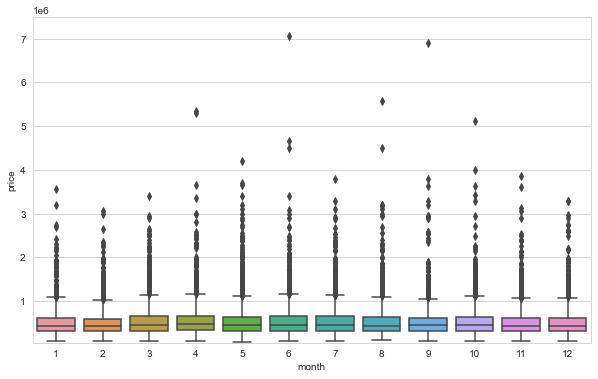

In [70]:
fig, ax = plt.subplots(figsize=(10,6))

ax = sns.boxplot(data=df,
                  x=df['month'], #each month's prices. Many outliers of $1,000,000+ exist in the data
                  y=df['price'])
ax.set_ylim(50000, 7500000)

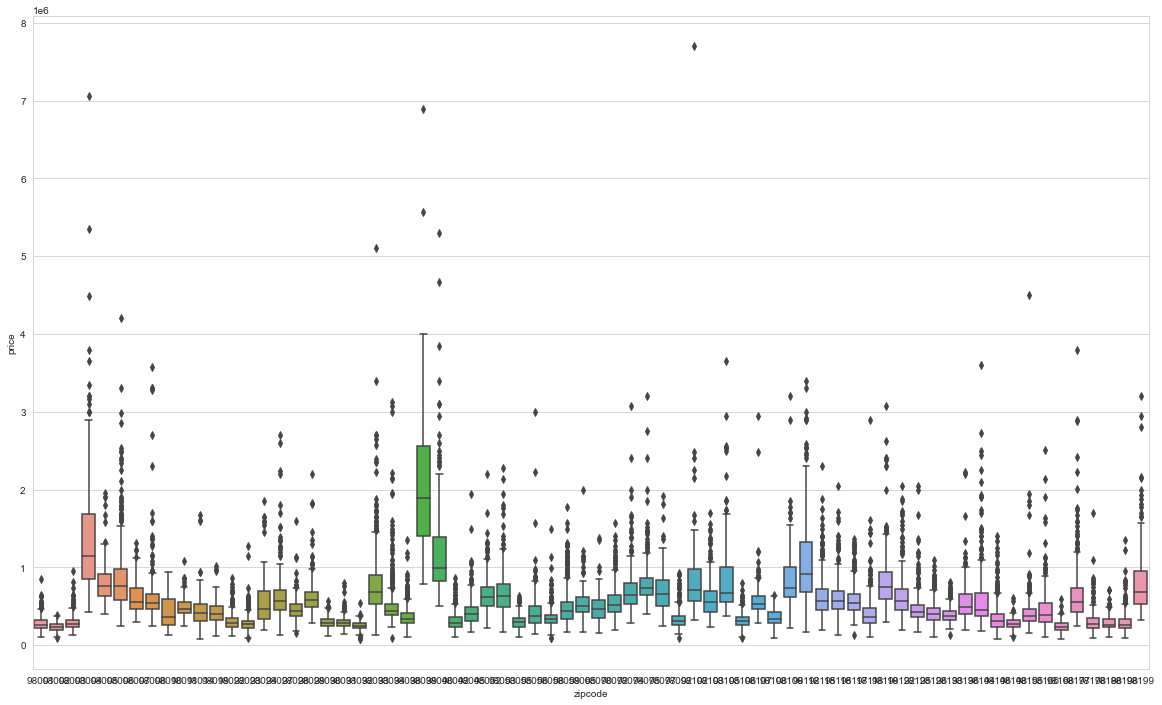

In [68]:
fig, ax = plt.subplots(figsize=(20,12))

ax = sns.boxplot(data=df,
                  x=df['zipcode'], #this is for which zipcodes are the most and least expensive (many outliers of homes with $1,000,000 or more exist) 
                  y=df['price'])
#ax.set_xticklabels(labels=df['zipcode'].unique(), rotation=90)